### Imports

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Data

In [96]:
# df_grp = pd.read_csv('data_grp.csv', sep=',')
# df_obs = pd.read_csv('data_obs.csv', sep=',')

# # Concate the two dataframes
# df = pd.concat([df_grp, df_obs], axis=1)

# # save in new csv file 
# df.to_csv('data.csv', index=False)

# df = pd.read_csv('data.csv', sep=',')
# # make df with only columns 1-5 
# df = df.iloc[:, 0:5]
# df.head()
# # save in new csv file 
# df.to_csv('data.csv', index=False)

df = pd.read_csv('data.csv', sep=',')
# # Give the columns names 
# df.columns = ['Class', 'Feature1', 'Feature2', 'Feature3', 'Feature4']
df.head()

,Class,Feature1,Feature2,Feature3,Feature4
0,Cancer,0.025409,0.051085,0.056305,0.021738
1,Cancer,0.025536,0.036123,0.054195,0.009735
2,Cancer,0.012817,0.029652,0.079290,0.050677
3,Cancer,0.019846,-0.010577,-0.007504,0.019042
4,Cancer,0.039048,0.039355,0.001343,0.026221


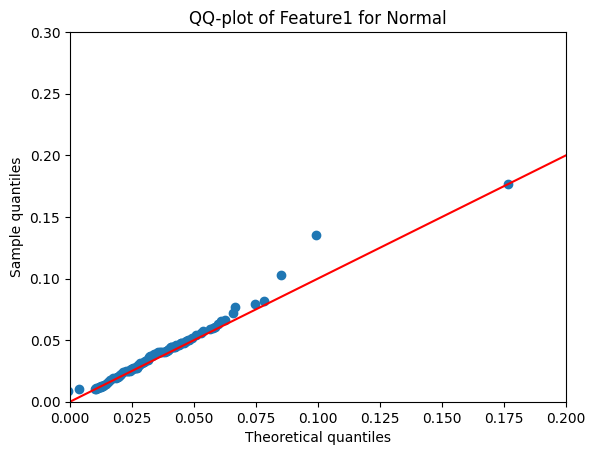

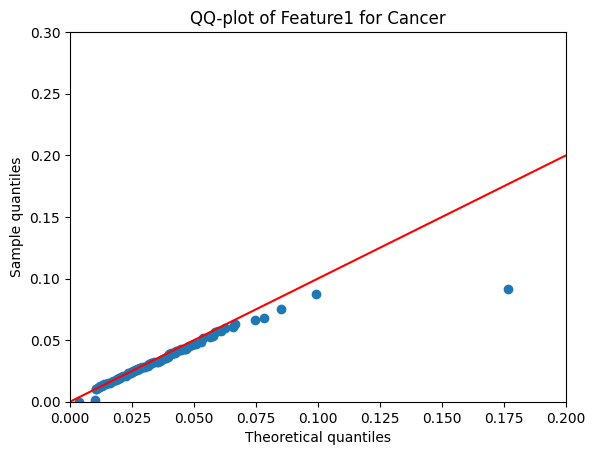

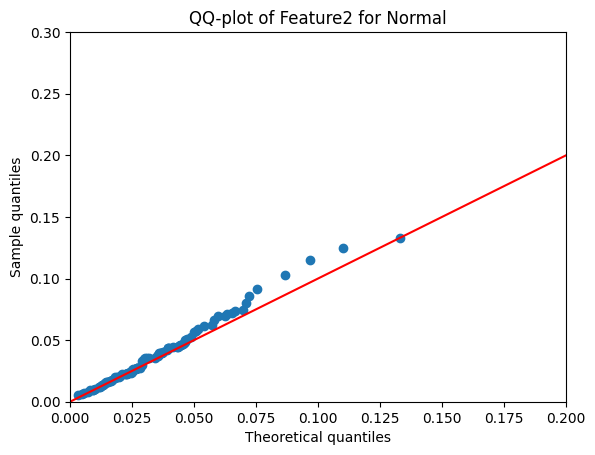

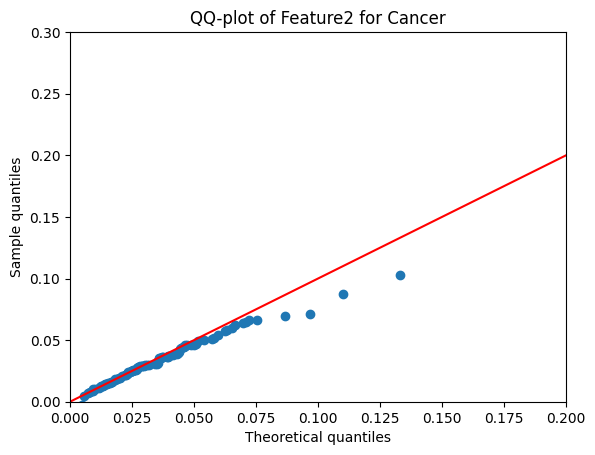

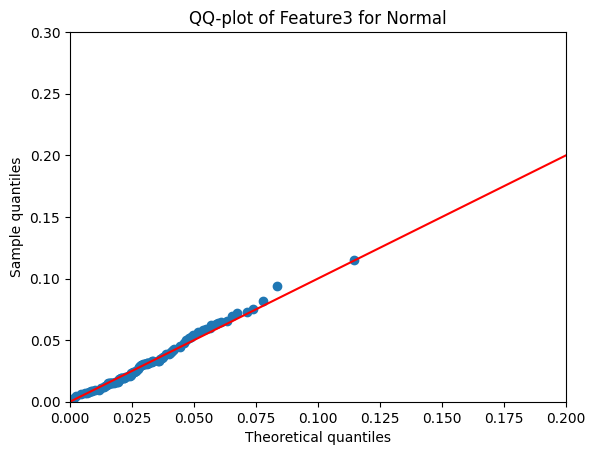

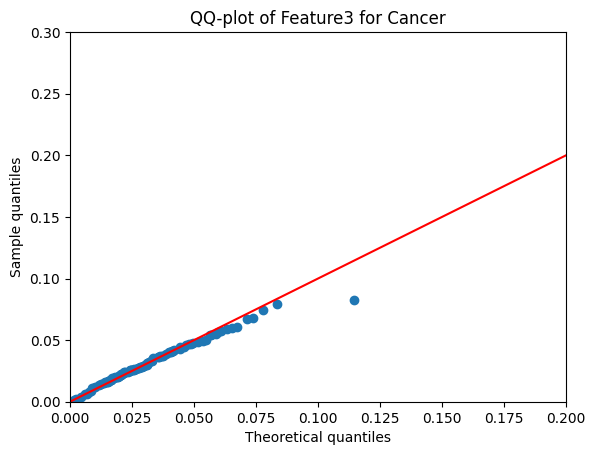

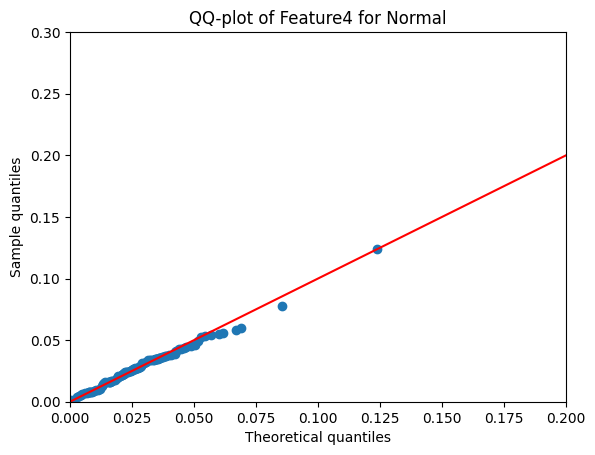

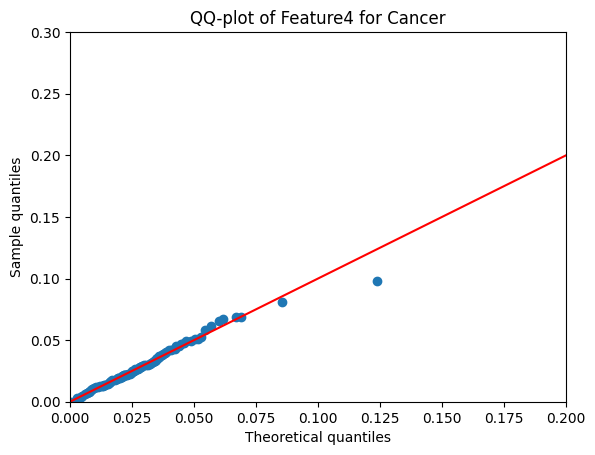

In [97]:
### Hold out a fraction of the samples for all three classes as test data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

### Create a qq-plot of each feature for the class and compare the data to a theoretical normal distribution
def qq_plot(data, feature, class_name): 
    plt.figure() # Create a new figure
    plt.title("QQ-plot of " + feature + " for " + class_name) # Set the title
    plt.xlabel("Theoretical quantiles") # Set the x-axis label
    plt.ylabel("Sample quantiles") # Set the y-axis label
    plt.scatter(np.quantile(data[feature], np.linspace(0, 1, 100)), np.quantile(data[data["Class"] == class_name] [feature], np.linspace(0, 1, 100))) 
    plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color="red")
    # Make X - axis only go to 0.2 and y - axis only go to 0.3
    plt.ylim(0, 0.3)
    plt.xlim(0, 0.2)
    plt.show()

for feature in ["Feature1", "Feature2", "Feature3", "Feature4"]: # Loop over the features
    for class_name in ["Normal", "Cancer"]: # Loop over the classes
        qq_plot(train_data, feature, class_name) # Create a qq-plot for each feature and class